In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [4]:
## 1 point
df = pd.read_csv('diabetes.csv')
df.head(5)
## ToDo: read the csv file into a dataframe and show the first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
from sklearn.model_selection import train_test_split

In [12]:
## 3 points
y = df['Outcome']
X = df.loc[:,df.columns !='Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X,y)
print('the coefficients is {}'.format(logmodel.coef_))
print('The intercept is {}'.format(logmodel.intercept_))


## Assign the Outcome variable to y and the rest to X.
## USe LogisticRegression to fit the data and print out the intercept and the coefficients

the coefficients is [[ 1.22504069e-01  3.51145023e-02 -1.33049556e-02  7.76905371e-04
  -1.17362942e-03  8.96385464e-02  8.67835945e-01  1.49802381e-02]]
The intercept is [-8.3646385]


In [8]:
## 2 points

## Explain what the code is doing:

## What are the prior probabilities of the intercept and coefficients?

# Which likelihood distribution has been used?

## What does pm.invlogit(linreg) mean?

## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(df.shape[0]) + w1 * df.Pregnancies.values + w2 * df.Glucose.values \
    + w3 * df.BloodPressure.values + w4 * df.SkinThickness.values + w5 * df.Insulin.values + \
    w6 * df.BMI.values + w7 * df.DiabetesPedigreeFunction.values + w8 * df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40566587), 'w1': array(0.12317335), 'w2': array(0.03516494), 'w3': array(-0.01329346), 'w4': array(0.00061019), 'w5': array(-0.00119141), 'w6': array(0.08970645), 'w7': array(0.94600868), 'w8': array(0.01487663)}


### Explain what the code is doing:

The code implement linear regression. It accomplishes this model as it defines the coefficients for each of the column variables as coming from a normal distribution with a mean of 0 and a standard deviation of 100.
wo is for the intercept.w0 to w8 is prior, after they are created,then the expected value specifying a linear relationship is calculated. After that we calculate the likelihood by using Bernoulli distribution. Finally, we use map_est to find posterior estimate.

### What are the prior probabilities of the intercept and coefficients?


w0 - intercept
w1,w2,w3,w4,w5,w6,w7,w8 - coefficient

### Which likelihood distribution has been used?

Bernoulli distribution

### What does pm.invlogit(linreg) mean?

The function invlogit means the inverse of the logit function, 1 / (1 + exp(-x)).
In this case, it helps us transfer the data from the y-axis to the x-axis

### What is map_est?

Finds the local maximum a posteriori point given a model.
In this case, it gives us the posteriori

<ipython-input-14-5c9a761610b4>:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(400, step=pm.Metropolis())
Only 400 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]


Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 17 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/swagyangjh/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'w0'}>,
        <AxesSubplot:title={'center':'w1'}>,
        <AxesSubplot:title={'center':'w2'}>],
       [<AxesSubplot:title={'center':'w3'}>,
        <AxesSubplot:title={'center':'w4'}>,
        <AxesSubplot:title={'center':'w5'}>],
       [<AxesSubplot:title={'center':'w6'}>,
        <AxesSubplot:title={'center':'w7'}>,
        <AxesSubplot:title={'center':'w8'}>]], dtype=object)

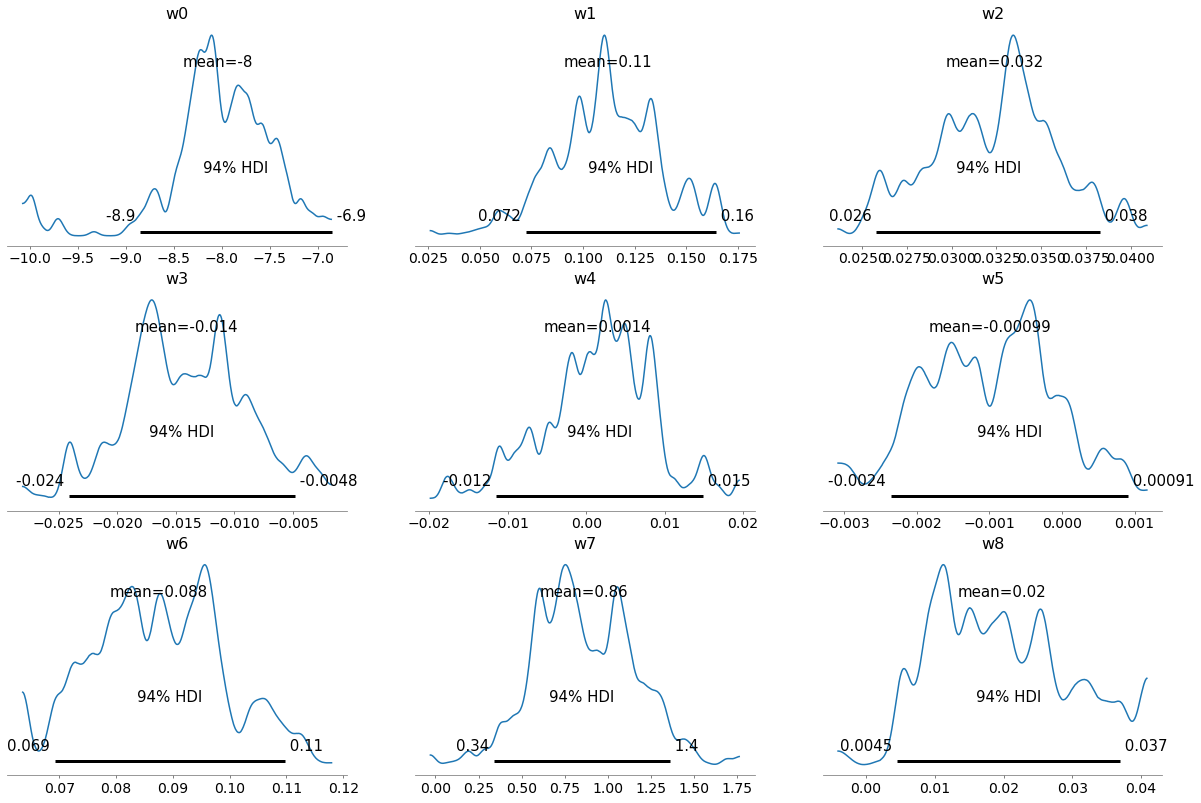

In [14]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    trace = pm.sample(400, step=pm.Metropolis())
## Explain the output of the plot 
az.plot_posterior(trace)

The output above displays the posterior distribution of the 8 columns parameter estimates taken from the model above using the Metropolis algorithm from pymc3. All points within this interval have a higher probability density than points outside the interval.If the samples converged then the values of the mean would match up with the posterior calculated above and their graph would look more like a normal graph. In order to make the sample converge, we need to take more samples. Overall, the graphs show that only taking 400 samples is not enough.

## github Link: https://github.com/SwagYangJH/UMD_606.git